Cluster analysis is used in marketing to precisely categorize customers in order to improve customer marketing effectiveness through personalisation. A popular cluster analysis technique is k-means cluster analysis, which is often referred to as scientific segmentation. The resulting clusters aid in improving consumer modeling and predictive analytics, as well as in targeting customers with offers and incentives that are tailored to their wants, requirements, and preferences.

In [1]:
#Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Importing the dataset

df = pd.read_csv("assessment.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2635 non-null   int64  
 1   Channel                  2633 non-null   float64
 2   TotalTransactionAmount   2635 non-null   int64  
 3   Tx_Count                 2635 non-null   int64  
 4   DaysSinceLastTrans       2635 non-null   int64  
 5   reseller_id              2633 non-null   float64
 6   superdealer_id           2633 non-null   float64
 7   Product_ServiceProvider  2456 non-null   object 
 8   Product_Type             2456 non-null   object 
 9   Product_Category         2456 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 206.0+ KB


In [4]:
df.describe()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id
count,2635.000000,2633.000000,2.635000e+03,2635.000000,2635.000000,2633.000000,2633.000000
mean,1251.568880,1.730725,5.815019e+04,91.971157,119.154459,108.876946,389.900494
std,664.557929,1.834539,5.766734e+05,1223.775908,84.336623,379.661037,271.553301
min,3.000000,1.000000,1.000000e+00,1.000000,30.000000,0.000000,0.000000
25%,816.000000,1.000000,2.000000e+02,1.000000,54.000000,0.000000,447.000000
50%,1140.000000,1.000000,1.000000e+03,3.000000,107.000000,0.000000,447.000000
75%,1613.500000,2.000000,4.952000e+03,9.000000,147.000000,0.000000,447.000000
max,2725.000000,10.000000,2.086921e+07,46531.000000,735.000000,2557.000000,2494.000000


In [5]:
df.head()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [6]:
# remove the unneccessary column
df.drop(["user_id", "reseller_id", "superdealer_id", "Channel", "DaysSinceLastTrans"], axis = 1, inplace=True)
df

,TotalTransactionAmount,Tx_Count,Product_ServiceProvider,Product_Type,Product_Category
0,532700,137,Jos Electric,Postpaid,Electricity
1,1635552,131,MTN,Airtime,Telco
2,548300,114,Jos Electric,Postpaid,Electricity
3,12200,13,Airtel,Data,Telco
4,211700,75,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...
2630,1400,4,MTN,Airtime,Telco
2631,1600,8,Ikeja Electric,Prepaid,Electricity
2632,200,1,Ikeja Electric,Postpaid,Electricity
2633,9000,9,Eko Electric,Prepaid,Electricity


In [7]:
# Dta preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Product_ServiceProvider']= le.fit_transform(df['Product_ServiceProvider'])
df['Product_Type']= le.fit_transform(df['Product_Type'])
df['Product_Category']= le.fit_transform(df['Product_Category'])
df


,TotalTransactionAmount,Tx_Count,Product_ServiceProvider,Product_Type,Product_Category
0,532700,137,9,4,2
1,1635552,131,10,0,3
2,548300,114,9,4,2
3,12200,13,1,1,3
4,211700,75,9,5,2
...,...,...,...,...,...
2630,1400,4,10,0,3
2631,1600,8,7,5,2
2632,200,1,7,4,2
2633,9000,9,3,5,2


In [8]:
print(df["Product_ServiceProvider"].nunique())
print(df["Product_Type"].nunique())
print(df["Product_Category"].nunique())



14
8
6


Separating the data into X and Y.
Y here represents what we want to cluster with i.e our reference point.
Y here is the TotalTransactionAmount


In [9]:
X = df.iloc[:, [0, 1, 2, 3, 4]]
X

,TotalTransactionAmount,Tx_Count,Product_ServiceProvider,Product_Type,Product_Category
0,532700,137,9,4,2
1,1635552,131,10,0,3
2,548300,114,9,4,2
3,12200,13,1,1,3
4,211700,75,9,5,2
...,...,...,...,...,...
2630,1400,4,10,0,3
2631,1600,8,7,5,2
2632,200,1,7,4,2
2633,9000,9,3,5,2


In [10]:
y = df.iloc[:, 0]
y

0        532700
1       1635552
2        548300
3         12200
4        211700
         ...   
2630       1400
2631       1600
2632        200
2633       9000
2634        100
Name: TotalTransactionAmount, Length: 2635, dtype: int64

Text(0.5, 1.0, 'Clusters before K-means')

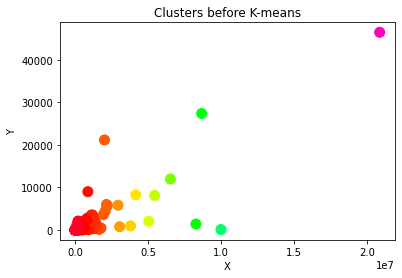

In [11]:
#Visualize data before K-means is applied
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=100, cmap='gist_rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters before K-means')

In [12]:
# Split Dataset into Train and test set for model development.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

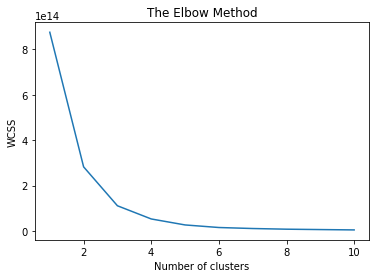

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#Initiate Wcss using empty list
wcss = []
#initiate iteration process using a for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #Append results to wcss list
    wcss.append(kmeans.inertia_)
#Plot results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As can be seen from the illustration, the ideal value of k is 5.


Now, Print Labels predicted by the model.

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [15]:
#Centers identified and calculates
centers = kmeans.cluster_centers_
centers

array([[1.34121233e+04, 1.73149150e+01, 5.41421947e+00, 8.82921175e-01,
        3.04945904e+00],
       [2.08692080e+07, 4.65310000e+04, 1.00000000e+01, 0.00000000e+00,
        3.00000000e+00],
       [8.35974475e+06, 1.02132500e+04, 6.75000000e+00, 2.75000000e+00,
        3.25000000e+00],
       [4.06477300e+06, 4.32716667e+03, 8.83333333e+00, 3.00000000e+00,
        3.00000000e+00],
       [1.10606564e+06, 2.33850000e+03, 5.97222222e+00, 1.30555556e+00,
        2.58333333e+00]])

In [16]:
kmeans.labels_

array([0, 4, 0, ..., 0, 0, 0])

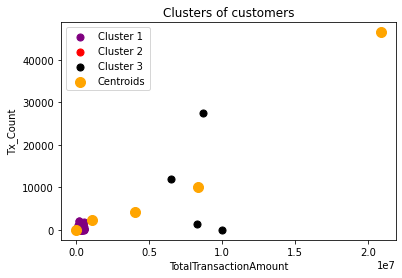

In [17]:
#Convert X to an np array 
X_1=np.array(X)
# Visualising the clusters
#1st CLuster
plt.scatter(X_1[y_kmeans == 0, 0], X_1[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
#2nd Cluster
plt.scatter(X_1[y_kmeans == 1, 0], X_1[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
#3rd Cluster
plt.scatter(X_1[y_kmeans == 2, 0], X_1[y_kmeans == 2, 1], s = 50, c = 'black', label = 'Cluster 3')

#Number of centriods against lables
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('TotalTransactionAmount')
plt.ylabel('Tx_Count')
plt.legend()

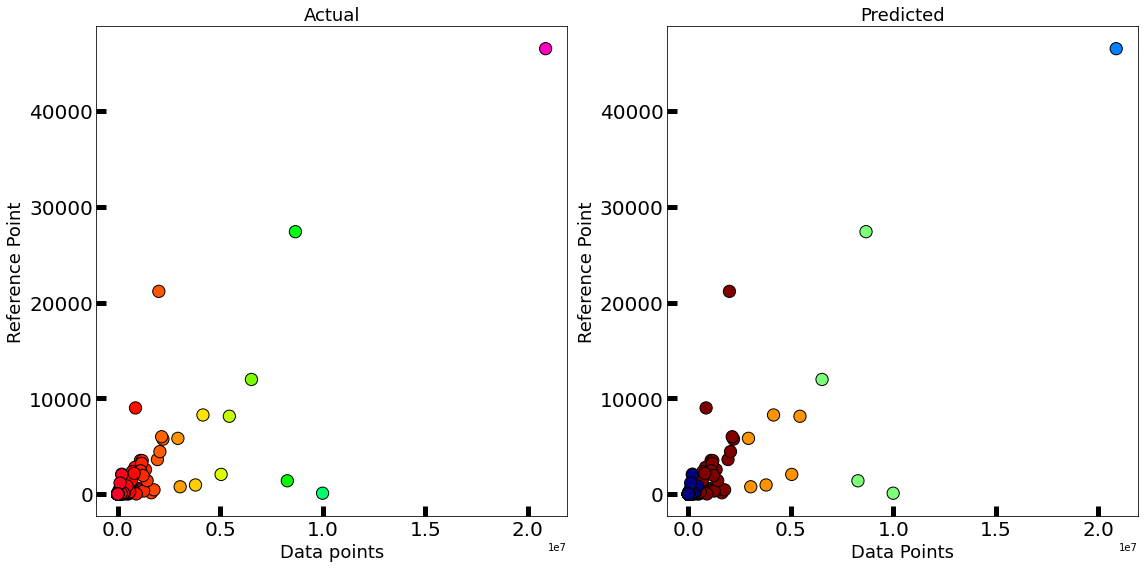

In [18]:
#Visualizing Clusters after k-means
new_labels = kmeans.labels_
#Visualize data with reference to before and after k-means clustering
#Actual vs predicted plot
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Data points', fontsize=18)
axes[0].set_ylabel('Reference Point', fontsize=18)
axes[1].set_xlabel('Data Points', fontsize=18)
axes[1].set_ylabel('Reference Point', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.tight_layout()

Conclusion
K means clustering is a widely used clustering algorithm that practitioners frequently use to gain an understanding of the structure of a dataset when tackling clustering problems. K means are used to classify data points into discrete non-overlapping subgroups. One of the most common uses of K means clustering is segmenting clients in order to have a better understanding of them, which can then be used to boost the company's income.